# Importing the modules 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.colors as colors
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import scale 
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA 

Dataset is from **[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)** and **[Heart Disease Dataset](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)** is used. This dataset enables us to predict the heart disease in an individual, taking into account features such as gender, age, blood pressure, and other various measurements.

In [2]:
df = pd.read_csv('data/processed.cleveland.data' , header= None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


# Column names:

- **age**, **Float**
- **sex** - **Category**
  - 0 = female
  - 1 = male
- **cp**, chest pain, **Category**
  - 1 = typical angina,
  - 2 = atypical angina,
  - 3 = non-anginal pain,
  - 4 = asymptomatic
- **restbp**, resting blood pressure (in mm Hg), **Float**
- **chol**, serum cholesterol in mg/dl, **Float**
- **fbs**, fasting blood sugar, **Category**
  - 0 = >=120 mg/dl
  - 1 = <120 mg/dl
- **restecg**, resting electrocardiographic results, **Category**
  - 1 = normal
  - 2 = having ST-T wave abnormality
  - 3 = showing probable or definite left ventricular hypertrophy
- **thalach**,  maximum heart rate achieved, **Float**
- **exang**, exercise induced angina, **Category**
  - 0 = no
  - 1 = yes
- **oldpeak**, ST depression induced by exercise relative to rest. **Float**
- **slope**, the slope of the peak exercise ST segment, **Category**
  - 1 = upsloping
  - 2 = flat
  - 3 = downsloping
- **ca**, number of major vessels (0-3) colored by fluoroscopy, **Float**
- **thal**, thalium heart scan, **Category**
  - 3 = normal (no cold spots)
  - 6 = fixed defect (cold spots during rest and exercise)
  - 7 = reversible defect (when cold spots only appear during exercise)

In [3]:
df.columns = ['age',
              'sex',
              'cp',
              'restbp',
              'chol',
              'fbs',
              'restecg',
              'thalach',
              'exang',
              'oldpeak',
              'slope',
              'ca',
              'thal',
              'hd']
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


# Missing Data: Identifying Missing Data

In [4]:
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [5]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [6]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [7]:
len(df.loc[ ( df['ca'] == '?' ) | (df['thal'] == '?') ]) 
#df['thal'].value_counts()
#df['ca'].value_counts()

6

In [8]:
df.loc[ ( df['ca'] == '?' ) | (df['thal'] == '?') ]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [9]:
df.shape #len(df)

(303, 14)

In [10]:
df_no_missing_value = df.loc[(df['ca'] != '?' ) & (df['thal'] != '?')]

In [11]:
len(df_no_missing_value)

297

# Spliting Data

In [12]:
X = df_no_missing_value.drop('hd', axis=1).copy()

In [13]:
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [14]:
Y = df_no_missing_value['hd'].copy()
Y.head()
Y.value_counts()

hd
0    160
1     54
2     35
3     35
4     13
Name: count, dtype: int64

# Format the Data : One-Hot Encoding

In [15]:
X.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
dtype: object

In [16]:
X['cp'].unique()


array([1., 4., 3., 2.])

In [17]:
pd.get_dummies(X, columns=['cp']).head()

,age,sex,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,True,False,False,False
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,False,False,False,True
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,False,False,False,True
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,False,False,True,False
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,False,True,False,False


In [18]:
X_encoded = pd.get_dummies(X, columns=['cp', 'restecg', 'slope', 'thal'])
X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,True,...,False,False,False,True,False,False,True,False,True,False
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,False,...,True,False,False,True,False,True,False,True,False,False
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,False,...,True,False,False,True,False,True,False,False,False,True
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,False,...,False,True,False,False,False,False,True,True,False,False
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,False,...,False,False,False,True,True,False,False,True,False,False


In [19]:
Y.unique()

array([0, 2, 1, 3, 4])

In [20]:
#Creating a boolean array where each element is True if the corresponding element in Y is greater than 0, and False otherwise.
Y_not_zero_index = Y > 0 
#Setting all elements in Y that correspond to True in Y_not_zero_index to 1.
Y[Y_not_zero_index] = 1

In [21]:
Y.unique()

array([0, 1])

In [22]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

# Define the attributes for which you want to create histograms
attributes = ['age', 'sex', 'restbp', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'cp']

# Create a dropdown menu for selecting the attribute
dropdown = widgets.Dropdown(options=attributes, description='Attribute:')

# Define a function for creating the histogram
def create_histogram(attribute):
    fig, ax = plt.subplots(figsize=(10, 8))
    df[df['hd'] == 0][attribute].hist(alpha=0.5, bins=30, label='No', ax=ax)
    df[df['hd'] > 0][attribute].hist(alpha=0.5, bins=30, label='Yes', ax=ax)
    ax.set_title(f'Histogram of {attribute} vs hd', fontsize=16)
    ax.set_xlabel(attribute, fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

# Create an interactive plot
widgets.interact(create_histogram, attribute=dropdown)

interactive(children=(Dropdown(description='Attribute:', options=('age', 'sex', 'restbp', 'chol', 'fbs', 'rest…

<function __main__.create_histogram(attribute)>

In [23]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

# Define the attributes for which you want to create scatter plots
attributes = ['age', 'sex', 'restbp', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'cp']

# Create two dropdown menus for selecting the attributes
dropdown1 = widgets.Dropdown(options=attributes, description='Attribute 1:')
dropdown2 = widgets.Dropdown(options=attributes, description='Attribute 2:')

# Define a function for creating the scatter plot
def create_scatterplot(attribute1, attribute2):
    fig, ax = plt.subplots(figsize=(10, 8))
    df[df['hd'] == 0][0:100].plot(kind='scatter', x=attribute1, y=attribute2, color='DarkBlue', label='No', ax=ax)
    df[df['hd'] > 0][0:100].plot(kind='scatter', x=attribute1, y=attribute2, color='Yellow', label='Yes', ax=ax)
    ax.set_title(f'{attribute1} vs {attribute2} with respect to hd', fontsize=16)
    ax.set_xlabel(attribute1, fontsize=14)
    ax.set_ylabel(attribute2, fontsize=14)
    plt.grid(True)
    plt.legend(loc='upper right')
    plt.show()

# Create an interactive plot
widgets.interact(create_scatterplot, attribute1=dropdown1, attribute2=dropdown2)

interactive(children=(Dropdown(description='Attribute 1:', options=('age', 'sex', 'restbp', 'chol', 'fbs', 're…

<function __main__.create_scatterplot(attribute1, attribute2)>

<a id="center-and-scale"></a>
# Format the Data : Centering and Scaling

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
X_train_scale = scale(X_train)
X_test_scale = scale(X_test)

Determining the most important features for predicting heart disease can depend on the specific dataset and the machine learning model used. However, research has identified several key factors that are often significant in predicting heart disease¹²:

1. **Age**: Older age is associated with a higher risk of heart disease.
2. **Sex**: Men are generally at greater risk of heart disease.
3. **Chest Pain (cp)**: The type of chest pain can be a significant predictor.
4. **Resting Blood Pressure (restbp)**: High blood pressure can increase the risk of heart disease.
5. **Cholesterol (chol)**: High cholesterol levels can lead to heart disease.
6. **Fasting Blood Sugar (fbs)**: High fasting blood sugar can indicate a higher risk of heart disease.
7. **Resting Electrocardiographic Results (restecg)**: Abnormal results can indicate heart disease.
8. **Maximum Heart Rate Achieved (thalach)**: Lower maximum heart rate can indicate a higher risk of heart disease.
9. **Exercise Induced Angina (exang)**: The presence of angina during exercise can be a significant predictor.
10. **Oldpeak**: ST depression induced by exercise relative to rest, a higher value can indicate a higher risk of heart disease.
11. **Slope**: The slope of the peak exercise ST segment, certain types can indicate a higher risk of heart disease.


-  https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-021-01527-5.
-  https://link.springer.com/article/10.1007/s10586-023-04062-2.
-  https://www.healthy-heart.org/keep-your-heart-healthy/predicting-managing-risk-of-heart-disease/.
-  https://www.nature.com/articles/s41598-024-51184-7.pdf.

# Building A Preliminary Support Vector Machine


In [25]:
from sklearn import svm
from sklearn.metrics import accuracy_score

for k in ('linear', 'poly', 'rbf', 'sigmoid'):
    clf = svm.SVC(kernel = k)
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_train)
    print(k)
    print(accuracy_score(Y_train, Y_pred))

linear
0.8783783783783784
poly
0.6891891891891891
rbf
0.6531531531531531
sigmoid
0.5495495495495496


In [26]:
clf_svm = SVC()
clf_svm.fit(X_train_scale, Y_train)

SVC()

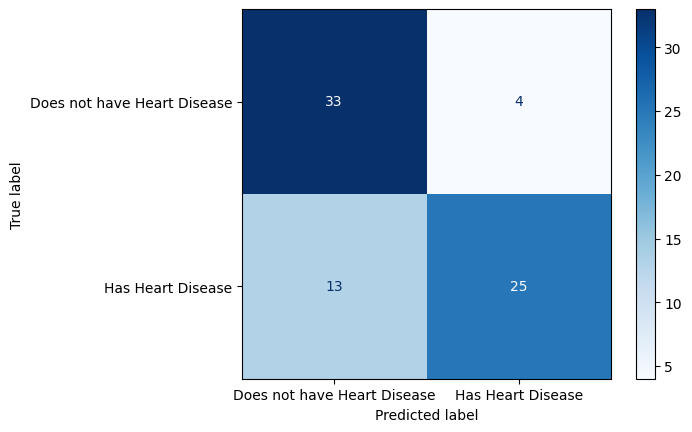

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Make predictions on the test data
Y_pred = clf_svm.predict(X_test_scale)

# Generate the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Define the display labels
labels = ['Does not have Heart Disease', 'Has Heart Disease']

# Visualize the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Optimizing Parameters with Cross Validation

In [28]:
param_grid = [
    {'C' : [1,10,100,1000], #This is the regularization parameter.
     'gamma' : [0.001, 0.0001], #This defines how far a single training example reaches.
     'kernel' : ['linear']} #‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’
    ]
optimal_params = GridSearchCV(
    SVC(),
    param_grid, 
    cv = 5, 
    verbose= 0 #This means that the function won’t display any messages while it’s running
)

optimal_params.fit(X_train_scale, Y_train)
#give us the parameters that performed the best.
optimal_params.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'linear'}

# Building, Evaluating, Drawing, and Interpreting Support Vector Machine model

In [29]:
clf_svm = SVC(C = 1, gamma= 0.001)
clf_svm.fit(X_train_scale, Y_train) 

SVC(C=1, gamma=0.001)

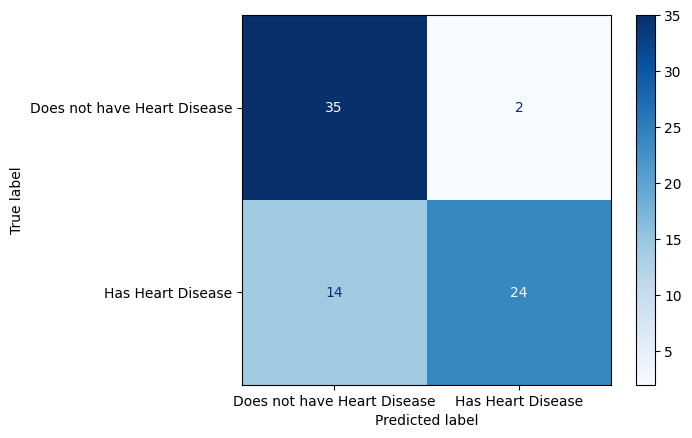

In [30]:
# Make predictions on the test data
Y_pred = clf_svm.predict(X_test_scale)

# Generate the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Define the display labels
labels = ['Does not have Heart Disease', 'Has Heart Disease']

# Visualize the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

- True Negatives (Top Left): 40 instances were correctly predicted as not having heart disease.
- False Positives (Top Right): 2 instances were incorrectly predicted as having heart disease.
- False Negatives (Bottom Left): 8 instances were incorrectly predicted as not having heart disease.
- True Positives (Bottom Right): 25 instances were correctly predicted as having heart disease.

In [31]:
# the values from the confusion matrix
TP = 25  # True Positives
TN = 40  # True Negatives
FP = 2   # False Positives
FN = 8   # False Negatives

# Calculate Precision
precision = TP / (TP + FP)

# Calculate Recall
recall = TP / (TP + FN)

# Calculate F1 Score
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")


Precision: 0.9259259259259259
Recall: 0.7575757575757576
F1 Score: 0.8333333333333334


**PCA** (Principal Component Analysis)

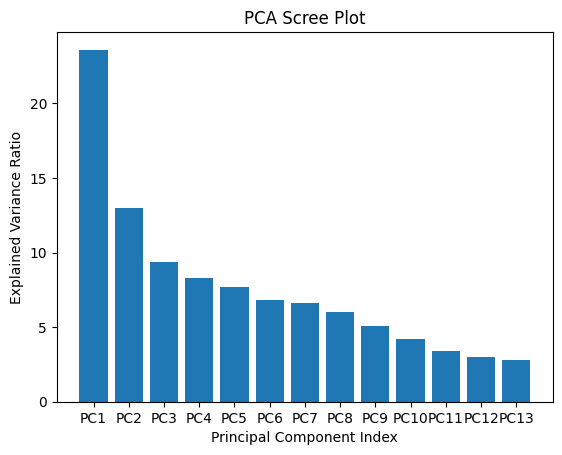

In [32]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Fit and transform the scaled data
X_train_pca = PCA().fit_transform(X_train_scale)

# Calculate percentage of explained variance
per_var = np.round(PCA().fit(X_train_scale).explained_variance_ratio_* 100, decimals=1)

# Create labels for the scree plot
labels = [f'PC{i}' for i in range(1, len(per_var)+1)]

# Generate the scree plot
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component Index')
plt.title('PCA Scree Plot')
plt.show()


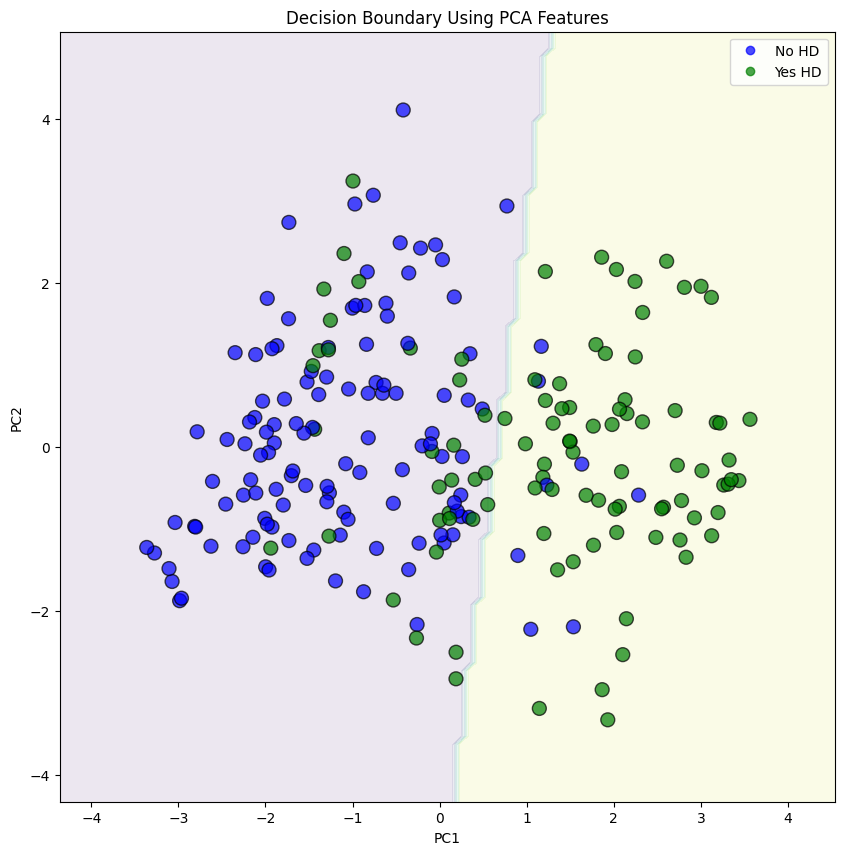

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

pc1 = X_train_pca[:, 0] 
pc2 = X_train_pca[:, 1]

# Fit the SVM to the x and y-axis coordinates of the data after PCA dimension reduction
clf_svm.fit(np.column_stack((pc1, pc2)), Y_train)

# Create a matrix of points that we can use to show the decision regions
x_min, x_max = pc1.min() - 1, pc1.max() + 1
y_min, y_max = pc2.min() - 1, pc2.max() + 1

xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),
                     np.arange(start=y_min, stop=y_max, step=0.1))

# Classify every point in the matrix with the SVM
Z = clf_svm.predict(np.column_stack((xx.ravel(), yy.ravel())))
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(10,10))

# Draw a filled contour plot using the matrix values and classifications
ax.contourf(xx, yy, Z, alpha=0.1)

# Create custom colors for the actual data points
cmap = colors.ListedColormap(['#0000ff', '#008000'])

# Draw the actual data points
scatter = ax.scatter(pc1, pc2, c=Y_train, cmap=cmap, s=100, edgecolors='k', alpha=0.7)

# Create a legend
legend = ax.legend(scatter.legend_elements()[0], scatter.legend_elements()[1], loc="upper right")
legend.get_texts()[0].set_text("No HD")
legend.get_texts()[1].set_text("Yes HD")

# Add axis labels and titles
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title('Decision Boundary Using PCA Features')

# Save the figure to a file if a certain condition is met
save_fig = True
if save_fig:
    plt.savefig('svm.png')

plt.show()
